</div>


<a href="https://www.bigdatauniversity.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0101ESCoursera33499360-2022-01-01"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/CCLog.png" width = 300, align = "center"></a>

<h1 align=center><font size = 5>Análisis de Datos con Python</font></h1>


Análisis de Datos Exploratorios


<h3>¡Bienvenido!</h3>
En esta sección exloraremo distintos métodos para ver si ciertas caracteristicas pueden ser usadas para predecir el precio de un coche.


<h2>Indice</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Importando los datos</a></li>
    <li><a href="https://#pattern_visualization">Análisis de patrones de características individuales mediante visualización</a></li>
    <li><a href="https://#discriptive_statistics">Analisis Estadistico Descriptivo</a></li>
    <li><a href="https://#basic_grouping">Conceptos Basicos de Agrupamiento</a></li>
    <li><a href="https://#correlation_causation">Correlación y Causalidad</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
</ol>

Estimated Time Needed: <strong>30 min</strong>

</div>

<hr>


<h3>¿Cuales son las caracteristcas principales que mas impactan en el precio de un coche?</h3>


<h2 id="import_data">1. Importando los datos del Modulo 2</h2>


<h4>Configuración</h4>


Importar librerías


In [1]:
import pandas as pd
import numpy as np

Cargamos los datos y los guardamos en un dataframe:


Este conjunto de datos fue almacenado como un objeto en IBM Cloud, haz clic <a href="https://cloud.ibm.com/registration/trial?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0101ESCoursera33499360-2022-01-01">AQUI</a> para almacenar gratuitamente.


In [2]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id="pattern_visualization">2. Análisis de patrones de características individuales mediante visualización</h2>


Para instalar seaborn usamos  pip que es el administrador de paquetes de python.


In [3]:
%%capture
! pip install seaborn

Importe los paquetes de visualización “Matplotlib” y “Seaborn”, no se olvide de “% matplotlib en línea” para dibujar en el mismo cuaderno Jupyter.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h4>¿Cómo elegir el método de visualización correcto?</h4>
<p>Al visualizar variables individuales, es importante entender primero con qué tipo de variable está tratando. Esto nos ayudará a encontrar el método de visualización correcto para esa variable.</p>


In [5]:
# lista de los tipos de datos para cada columna
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h3>Pregunta  #1:</h3>

<b>¿Cual es el tipo de dato de la columna "peak-rpm"? </b>

</div>


In [7]:
"float64"

'float64'

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

float64

-->


por ejemplo, podemos calcular la correlación entre variables de tipo “int64” o “float64” utilizando el método “corr”:


In [8]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Los elementos diagonales son siempre uno; estudiaremos la correlación más precisamente la correlación de Pearson y la tabla anova en profundidad al final de este post.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  #2: </h1>

<p>Encuentre la correlación entre las siguientes columnas: bore, stroke, compression-ratio , y horsepower.</p>
<p>Pista: si desea seleccionar aquellas columnas utilice la siguiente sintaxis: df[['bore','stroke' ,'compression-ratio','horsepower']]</p>
</div>


In [10]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()  

-->


<h2>Variables numéricas continuas:</h2> 

<p>Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de cierto rango. Las variables numéricas continuas pueden tener el tipo “int64” o “float64”. Una excelente manera de visualizar estas variables es mediante el uso de diagramas de dispersión con líneas ajustadas.</p>

<p>Para comenzar a comprender la relación (lineal) entre una variable individual y el precio. Podemos hacer esto usando “regplot”, que traza el diagrama de dispersión más la línea de regresión ajustada para los datos.</p>


Veamos varios ejemplos de diferentes relaciones lineales:


<h4>Relación lineal positiva</h4>


Busquemos el diagrama de dispersión de “tamaño del motor” y “precio”


(0.0, 55992.53855288224)

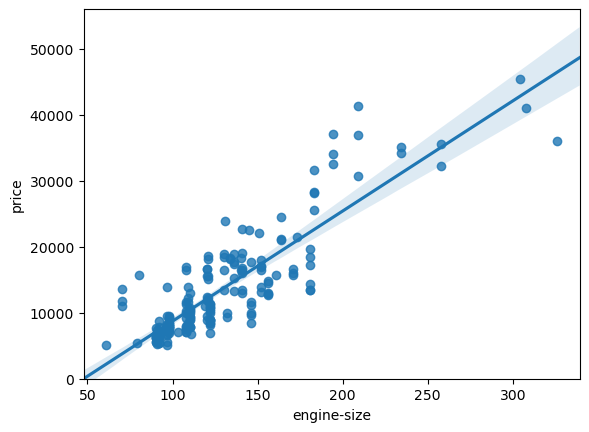

In [11]:
# Tamaño del motor como posible variable de predicción del precio
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>A medida que aumenta el tamaño del motor, aumenta el precio: esto indica una correlación directa positiva entre estas dos variables. El tamaño del motor parece ser un buen predictor de precio ya que la línea de regresión es casi una línea diagonal perfecta.</p>


Podemos examinar la correlación entre ‘tamaño del motor’ y ‘precio’ y ver que es aproximadamente 0.87


In [12]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


"Highway mpg" es una posible variable de predicción para el precio


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

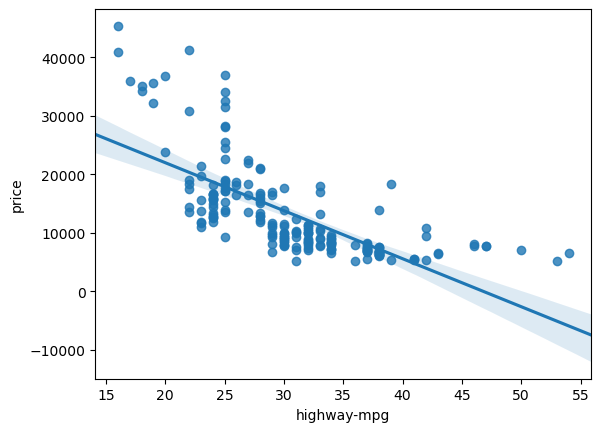

In [14]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>A medida que aumenta highway-mpg, el precio baja: esto indica un relación inversa/negativa entre estas dos variables. Highway m.p.g. podría predecir el precio.
 </p>


Podemos examinar la correlación entre 'highway-mpg' y 'price' y ver que es aproximandamente -0.704


In [13]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Relación Lineal Débil
</h3>


Veamos si "Peak-rpm" (rpm máximas) puede predecir "price" (precio).


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

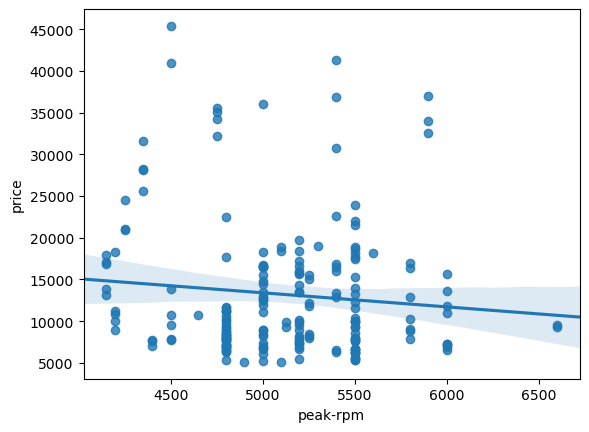

In [16]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Las rpm máximas no parecen ser un buen predictor del precio, ya que la línea de regresión está cerca de la horizontal. Además, los puntos de datos están muy dispersos y lejos de la línea ajustada, lo que muestra mucha variabilidad. Por lo tanto, no es una variable confiable.</p>


Podemos examinar la correlación entre ‘peak-rpm’ y ‘price’ y ver que es aproximadamente -0.101616


In [17]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Pregunta  3 a): </h1>

<p>Encuentre la correlación entre x="stroke", y="price". </p>
<p>Pista: si desea seleccionar aquellas columnas utilice la siguiente sintaxis: df[["stroke","price"]]</p>
</div>


In [18]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

#The correlation is 0.0823, the non-diagonal elements of the table.
#code:
df[["stroke","price"]].corr() 

-->


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta  3 b):</h1>

<p>Dada la correlación resultante entre "price" y "stroke", ¿Esperas una relación lineal?</p> 
<p>Verifica tus resultados con la función "regplot".</p>
</div>


<AxesSubplot:xlabel='stroke', ylabel='price'>

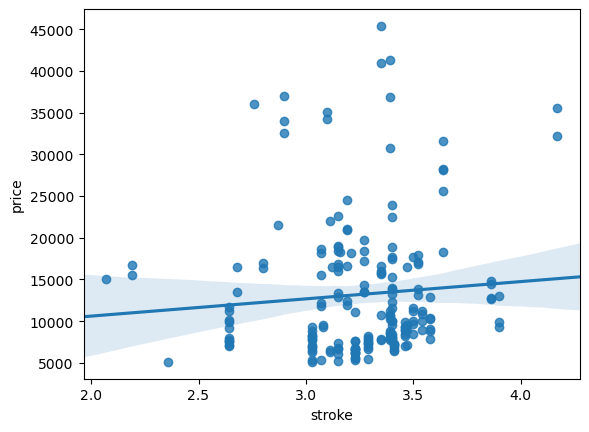

In [19]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
sns.regplot(x="stroke", y="price", data=df)

Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

#There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well.  We #can see this use "regplot" to demonstrate this.

#Code: 
sns.regplot(x="stroke", y="price", data=df)

-->


<h3>Variables categóricas</h3>

<p>Estas son variables que describen una ‘característica’ de una unidad de datos y se seleccionan de un pequeño grupo de categorías. Las variables categóricas pueden tener el tipo “objeto” o “int64”. Una buena forma de visualizar variables categóricas es mediante el uso de diagramas de caja.</p>


Veamos la relación entre “body-style” y “price”.


In [ ]:
sns.boxplot(x="body-style", y="price", data=df)

<p>Vemos que las distribuciones de precios entre las diferentes categorías de estilo de cuerpo tienen una superposición significativa, por lo que el estilo de cuerpo no sería un buen predictor del precio. Examinemos la ubicación del motor “engine-location” y el “precio” del motor:</p>


In [ ]:
        sns.boxplot(x="engine-location", y="price", data=df)

<p>Aquí vemos que la distribución del precio entre estas dos categorías de ubicación del motor, delantera y trasera, es lo suficientemente distinta como para tomar la ubicación del motor como un buen predictor potencial del precio.</p>


Examinemos “drive-wheels” y “price”.


In [ ]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Aquí vemos que la distribución de precios entre las diferentes categorías de drive-wheels es diferente; como tales, drive-wheels podría ser un predictor de precio.</p>


<h2 id="discriptive_statistics">3. Análisis Estadístico Descriptivo
</h2>


<p>Primero echemos un vistazo a las variables utilizando un método de descripción.</p>

<p>La función <b>describe</b> automáticamente calcula estadísticas básicas para todas las variables continuas. Cualquier valor de NaN se omite automáticamente en estas estadísticas.</p>

Esto mostrará:

<ul>
    <li>el recuento de esa variable</li>
    <li>la media</li>
    <li>la desviación estándar (std)</li> 
    <li>el valor mínimo</li>
    <li>el IQR (rango intercuartil: 25%, 50% y 75%)</li>
    <li>el valor máximo</li>
<ul>


Podemos aplicar el método “describe” de la siguiente manera:


In [ ]:
df.describe()

La configuración predeterminada de <b>describe</b> omite las variables de tipo objeto. Podemos aplicar el método “describe” en las variables de tipo ‘objeto’ de la siguiente manera:


In [ ]:
df.describe(include=['object'])

<h3>Contar Valores</h3>


<p>El conteo de valores es una buena forma de entender cuántas unidades de cada característica / variable tenemos. Podemos aplicar el método “value_counts” en la columna ‘drive-wheels’. No olvide que el método “value_counts” solo funciona en series Pandas, no en Pandas Dataframes. Como resultado, solo incluimos un corchete “df [‘drive-wheels’]” no dos corchetes “df [[‘drive-wheels’]]”
</p>


In [ ]:
df['drive-wheels'].value_counts()

Podemos convertir la serie en un dataframe de la siguient manera:


In [ ]:
df['drive-wheels'].value_counts().to_frame()

Repitamos los pasos anteriores, pero guardemos los resultados en el dataframe “drive_wheels_counts” y cambiemos el nombre de la columna ‘drive-wheels’ a ‘value_counts’.


In [ ]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

Renombremos el índice como 'drive-wheels':


In [ ]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

Podemos repetir el proceso anterior para la variable ‘engine-location’.


In [ ]:
# engine-location como variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

<p>Examinar los recuentos de valores de la ubicación del motor no sería una buena variable predictiva del precio. Esto se debe a que solo tenemos tres autos con motor trasero y 198 con motor delantero, este resultado es sesgado. Por lo tanto, no podemos sacar ninguna conclusión sobre la ubicación del motor.</p>


<h2 id="basic_grouping">4. Conceptos Basicos de Agrupamiento</h2>


<p>El método “groupby” agrupa los datos por diferentes categorías. Los datos se agrupan en función de una o varias variables y el análisis se realiza en los grupos individuales.</p>

<p>Por ejemplo, agrupemos por la variable “drive-wheels”. Sabemos que hay 3 categorías diferentes de ruedas.</p>


In [ ]:
df['drive-wheels'].unique()

<p>Si queremos saber, en promedio, qué tipo de rueda es más valiosa, podemos agrupar  “drive-wheels” y luego promediarlas.</p>

<p>Podemos seleccionar las columnas ‘drive-wheels’, ‘body-style’ y ‘price’, luego asignarlo a la variable “df_group_one”.</p>


In [ ]:
df_group_one = df[['drive-wheels','body-style','price']]

Luego podemos calcular el precio promedio para cada una de las diferentes categorías de datos.


In [ ]:
# resultados del agrupamiento
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

<p>Según nuestros datos, parece que los vehículos con tracción trasera son, en promedio, los más caros, mientras que las 4 ruedas y las ruedas delanteras tienen aproximadamente el mismo precio.</p>

<p>También puede agrupar con múltiples variables. Por ejemplo, agrupemos por ‘drive-wheels’ y ‘body-style’. Esto agrupa el marco de datos por las combinaciones únicas ‘drive-wheels’ y ‘body-style’. Podemos almacenar los resultados en la variable ‘grouped_test1’.</p>


In [ ]:
# resultados del agrupamiento
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

<p>Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica. Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila. Podemos convertir el marco de datos en una tabla dinámica utilizando el método “pivote” para crear una tabla dinámica a partir de los grupos.</p>

<p>En este caso, dejaremos la variable drive-wheels como las filas de la tabla y giraremos el body-style para convertirlas en las columnas de la tabla:</p>


In [ ]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

<p>A menudo, no tendremos datos para algunas de las celdas dinámicas. Podemos llenar estas celdas faltantes con el valor 0, pero cualquier otro valor también podría usarse. Cabe mencionar que la falta de datos es un tema bastante complejo y es un curso completo por sí solo.</p>


In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #rellena los valores faltantes con 0 
grouped_pivot

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Pregunta 4:</h1>

<p>Utiliza la función "groupby" para encontrar el "recio" promedio de cada coche basado en "body-style"</p>
</div>


In [20]:
# Escribe tu código aquí y presiona Shift+Enter para ejecutar
# resultados del agrupamiento
df_gptest = df[['body-style','price']]
grouped_test1 = df_gptest.groupby(['body-style'],as_index=False).mean()
grouped_test1

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Haz doble clic <b>aquí</b> para ver la solución.

<!-- The answer is below:

# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

-->


Si no se ha importado "pyplot" hagamoslo de nuevo.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Drive Wheels y Body Style contra Price</h4>


Usemos un mapa de calor para visualizar la relación entre Body Style vs Price.


In [ ]:
# utilizar los resultados agrupados 
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>El mapa de calor traza la variable objetivo (precio) proporcional al color con respecto a las variables ‘drive-wheel’ y ‘body-style’ en los ejes vertical y horizontal, respectivamente. Esto nos permite visualizar cómo se relaciona el precio con ‘drive-wheel’ y ‘body-style’.</p>

<p>Las etiquetas predeterminadas no nos transmiten información útil. Cambiemos eso:</p>


In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# nombres de las etiquetas 
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# mover etiquetas al centro 
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insertar etiquetas 
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotar las etiquetas si son muy largas 
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>La visualización es muy importante en la ciencia de datos, y los paquetes de visualización de Python proporcionan una gran libertad. Vamos a profundiza sobre esto en otro curso.</p>

<p>La pregunta principal que queremos responder en este módulo es “¿Cuáles son las características principales que tienen el mayor impacto en el precio del automóvil?”.</p>

<p>Para obtener una mejor medición de las características importantes, observamos la correlación de estas variables con el precio del automóvil, en otras palabras: ¿cómo depende el precio del automóvil de esta variable?</p>


<h2 id="correlation_causation">5. Correlación y causalidad
</h2>


<p><b>Correlación:</b> una medida del grado de interdependencia entre variables.</p>

<p><b>Causalidad:</b> la relación entre causa y efecto entre dos variables.</p>

<p>Es importante saber la diferencia entre estos dos y que la correlación no implica causalidad. Determinar la correlación es mucho más simple que la causalidad determinante ya que la causalidad puede requerir experimentación independiente.</p>


<p3>Correlación de Pearson</p3>

<p>La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.</p>
<p>El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:</p>
<ul>
    <li><b>1</b>: correlación lineal positiva total.</li>
    <li><b>0</b>: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.</li>
    <li><b>-1</b>: correlación lineal negativa total.</li>
</ul>


<p>Correlación de Pearson es el método predeterminado de la función “corr“. Como antes, podemos calcular la correlación de Pearson de las variables ‘int64’ o ‘float64’.

</p>


In [ ]:
df.corr()

A veces nos gustaría saber lo significativo de la estimación de correlación.


<b>Valor p</b>:

<p>¿Qué es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa.</p>

Por convención, cuando el

<ul>
    <li>El valor p es $<$ 0.001 decimos que hay pruebas sólidas de que la correlación es significativa.</li>
    <li>el valor p es $<$0.05: existe evidencia moderada de que la correlación es significativa.
</li>
    <li>el valor p es $<$0.1: existe evidencia débil de que la correlación es significativa.
</li>
    <li>el valor p es $>$ 0.1: no hay evidencia de que la correlación sea significativa.
</li>
</ul>


Podemos obtener esta información usando el módulo “stats” en la biblioteca “scipy”.


In [ ]:
from scipy import stats

<h3>Wheel-base vs Price</h3>


Calculemos el coeficiente de correlación de Pearson y el valor P de ‘wheel-base’ y ‘price’.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

<h5>Conclusión:</h5>
<p>Dado que el valor p es $<$0.001, la correlación entre la distancia entre wheel-base y  price es estadísticamente significativa, aunque la relación lineal no es extremadamente fuerte (~ 0.585).</p>


<h3>Horsepower vs Price</h3>


Calculemos el coeficiente de correlación de Pearson y el valor P de 'horsepower' y 'price'.


In [1]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

NameError: name 'stats' is not defined

<h5>Conclusión:</h5>

<p>Dado que el valor p es $<$0.001, la correlación entre los caballos de fuerza y el precio es estadísticamente significativa, y la relación lineal es fuerte (~ 0.809, cercana a 1).</p>


<h3>Length vs Price</h3>

Calculemos el coeficiente de correlación de Pearson y el valor P de 'length' y 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h5>Conclusión:</h5>
<p>Dado que el valor p es $<$0.001, la correlación entre la longitud y el precio es estadísticamente significativa, y la relación lineal es moderadamente fuerte (~ 0.691).</p>


<h3>Width vs Price</h3>


Calculemos el coeficiente de correlación de Pearson y el valor P de 'width' y 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

##### Conclusión:

Dado que el valor p es $<$0.001, la correlación entre la anchura y el precio es estadísticamente significativa, y la relación lineal es fuerte (\~ 0.751).


### Curb-weight vs Price


Calculemos el coeficiente de correlación de Pearson y el valor P de 'curb-weight' y 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h5>Conclusión:</h5>
<p>Dado que el valor p es $<$0.001, la correlación entre el peso en vacio y el precio es estadísticamente significativa, y la relación lineal es algo fuerte (~ 0.834).
</p>


<h3>Engine-size vs Price</h3>

Calculemos el coeficiente de correlación de Pearson y el valor P de 'engine-size' y 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

<h5>Conclusión:</h5>

<p>Dado que el valor p es $<$0.001, la correlación entre el tamaño del motor y el precio es estadísticamente significativa, y la relación lineal es muy fuerte (~0.872).</p>


<h3>Bore vs Price</h3>


Calculemos el coeficiente de correlación de Pearson y el valor P de 'bore' y 'price'.


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

<h5>Conclusión:</h5>
<p>Dado que el valor p es $<$0.001, la correlación entre el espacio y el precio es estadísticamente significativa, y la relación lineal moderada (~0.521).</p>


Podemos relacionar el proces para cada 'City-mpg' y 'Highway-mpg':


<h3>City-mpg vs Price</h3>


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h5>Conclusión:</h5>
<p>Dado que el valor P es $<$ 0.001, la correlación entre city-mpg y precio es estadisticamente significativa y el coeficiente de ~ -0.687 muestra que la relación es negativa y moderadamente fuerte.
</p>


<h3>Highway-mpg vs Price</h3>


In [ ]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

##### Conclusión:

Dado que el valor P es $<$ 0.001, la correlación entre highway-mpg y precio es estadisticamente significativa y el coeficiente de \~ -0.705 muestra que la relación es negativa y moderadamente fuerte.


<h2 id="anova">6. ANOVA</h2>


<h3>ANOVA: análisis de varianza</h3>
<p>El Análisis de varianza (ANOVA) es un método estadístico utilizado para evaluar si existen diferencias significativas entre las medias de dos o más grupos. ANOVA devuelve dos parámetros:</p>

<p><b>Puntuación de la prueba F</b>: ANOVA supone que las medias de todos los grupos son iguales, calcula cuánto se desvían las medias reales de la suposición y lo informa como la puntuación de la prueba F. Una puntuación mayor significa que hay una diferencia mayor entre las medias.</p>

<p><b>Valor P</b>:  El valor P indica cuán estadísticamente significativo es nuestro valor de puntaje calculado.</p>

<p>Si nuestra variable de precio está fuertemente correlacionada con la variable que estamos analizando, esperemos que ANOVA devuelva una puntuación considerable en la prueba F y un valor p pequeño.</p>


<h3>Volantes</h3>


<p>Dado que ANOVA analiza la diferencia entre diferentes grupos de la misma variable, la función groupby será útil. Debido a que el algoritmo ANOVA promedia los datos automáticamente, no necesitamos tomar el promedio de antemano.</p>

<p>Veamos si diferentes tipos de ‘wheel-base’ impactan ‘price’, agrupamos los datos.</p>


Veamos si diferentes tipos de ‘drive-wheels’ impactan ‘price’, agrupamos los datos.


In [21]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

KeyError: "['drive-wheels'] not in index"

In [ ]:
df_gptest

Obtenemos los valores del método de agrupamiento utilizando el método "get_group".


In [ ]:
grouped_test2.get_group('4wd')['price']

Podemos usar la función ‘f_oneway’ en el módulo ‘stats’ para obtener el puntaje de la <b>prueba F</b> y el <b>valor P.</b>


In [ ]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

Este es un gran resultado, con un puntaje de prueba F grande que muestra una fuerte correlación y un valor de P de casi 0 que implica una significación estadística casi segura. Pero, ¿significa esto que los tres grupos probados están altamente correlacionados?


#### Separadamente: fwd and rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

Examinemos los otros grupos


#### 4wd y rwd


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

<h4>4wd y fwd</h4>


In [ ]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

<h3>Conclusión: variables importantes</h3>


<p>Ahora tenemos una mejor idea de cómo se ven nuestros datos y qué variables son importantes a tener en cuenta al predecir el precio del automóvil. Lo hemos reducido a las siguientes variables:</p>

Variables numéricas continuas:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Variables categóricas:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>A medida que avanzamos en la construcción de modelos de aprendizaje automático para automatizar nuestro análisis, alimentar el modelo con variables que afecten significativamente nuestra variable objetivo mejorará el rendimiento de predicción de nuestro modelo.</p>


<h1>Gracias por completar este cuaderno</h1>


<div class="alert alert-block alert-info" style="margin-top: 20px">

```
<p><a href="https://cocl.us/corsera_da0101en_notebook_bottom"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/Images/BottomAd.png" width="750" align="center"></a></p>
```

</div>


<h3>Acerca de los Autores:</h3>

Este cuaderno fue escrito por <a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0101ESCoursera33499360-2022-01-01" target="_blank">Mahdi Noorian PhD</a>, <a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0101ESCoursera33499360-2022-01-01" target="_blank">Joseph Santarcangelo</a>, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan y <a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0101ESCoursera33499360-2022-01-01" target="_blank">Fiorella Wenver</a> y <a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

<p><a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0101ESCoursera33499360-2022-01-01" target="_blank">Joseph Santarcangelo</a> es un Cientifico de Datos en IBM que posee un Doctorado en Ingeniería Electrica. Su investigación se enfoca en el uso de Aprendizaje Automático, Procesamiento de Señales y Visión Artificial para determinar el impacto de los videos en la cognición. Joseph ha trabajado para IBM desde el término de su doctorado.
</p>


<hr>
<p>Copyright &copy; 2018 IBM Developer Skills Network. This notebook and its source code are released under the terms of the <a href="https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0101ESCoursera33499360-2022-01-01">MIT License</a>.</p>
